In [2]:
%matplotlib inline
import matplotlib.pylab as plt
import pandas as pd

# Analyse Facebook stock price

Obtain the Facebook stock data (symbol FB, URL: https://stooq.com/q/d/l/?s=FB.US&i=d) and print the last 10 trading dates. 

In [12]:
fb = pd.read_csv("https://stooq.com/q/d/l/?s=FB.US&i=d",index_col="Date",parse_dates=["Date"])
fb.tail(10)

,Open,High,Low,Close,Volume
Date,,,,,
2018-07-16,207.500,208.72,206.84,207.23,11078209
2018-07-17,204.900,210.46,204.84,209.99,15349892
2018-07-18,209.820,210.99,208.44,209.36,15334907
2018-07-19,208.770,209.99,207.76,208.09,11350429
2018-07-20,208.850,211.50,208.50,209.94,16241508
2018-07-23,210.580,211.62,208.80,210.91,16731969
2018-07-24,215.110,216.20,212.60,214.67,28468681
2018-07-25,215.715,218.62,214.27,217.50,64592585
2018-07-26,174.890,180.13,173.75,176.26,169803668


Create a new column `avgOC`, which is the average between the open and close price for each day. Plot this column, together with the "Low" and "High" column since June 2018. 

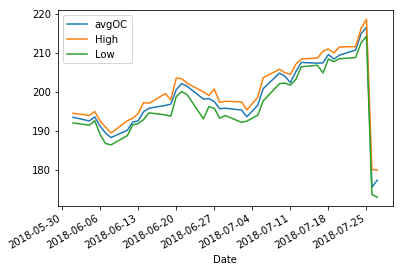

In [17]:
fb["avgOC"] = (fb["Open"] + fb["Close"])/2
fb["2018-06":].plot(y=["avgOC","High", "Low"])

How often was the Close price larger than, smaller than or equal to the Open price?

In [5]:
 sum( fb["Close"] > fb["Open"] ), sum( fb["Close"] < fb["Open"] ), sum( fb["Close"] == fb["Open"] )

(785, 768, 5)

# Compare with Apple

Now compare the Facebook with the Apple stock price. 

On how many days did the Close price of Facebook go up and the one of Apple go down?

In [13]:
apple = pd.read_csv("https://stooq.com/q/d/l/?s=AAPL.US&i=d",index_col="Date",parse_dates=["Date"])

adown = apple["Close"].pct_change() < 0
fbup = fb["Close"].pct_change() > 0
fbup.tail()
sum(adown & fbup)

298

Calculate the correlation coefficient between the percentage change of the Close prices for Apple and Facebook

In [7]:
pivot = pd.DataFrame()
pivot["AAPLpct"] = apple["Close"].pct_change()
pivot["FBpct"] = fb["Close"].pct_change()

pivot.corr()

,AAPLpct,FBpct
AAPLpct,1.000000,0.237696
FBpct,0.237696,1.000000


In [15]:
pivot.tail(10)

,AAPLpct,FBpct
Date,,
2018-07-16,-0.002195,-0.000434
2018-07-17,0.002829,0.013319
2018-07-18,-0.005484,-0.003000
2018-07-19,0.007773,-0.006066
2018-07-20,-0.002293,0.008890
2018-07-23,0.000888,0.004620
2018-07-24,0.007254,0.017828
2018-07-25,0.009430,0.013183
2018-07-26,-0.003131,-0.189609
